In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Ejercicio 1: Correlación

#### (a) Grafico de dispersion para pixeles vecinos

In [8]:
#Funcion para formar bloques de pixeles vecinos
def formar_bloques(img):
    X1 = []
    X2 = []
    for i in range(len(img)):
        for j in range(len(img)):
            if j % 2 != 0:
                X1.append(img[i][j])
            else:
                X2.append(img[i][j])
    return np.array([X1, X2])

#Funcion para graficar la imagen y el grafico de dispersion
def grafico_dispersion(X, img, title):

    fig, axes = plt.subplots(1, 2, figsize = (10, 5))

    # Imagen en grises
    axes[0].imshow(img, cmap = "gray")
    axes[0].set_title(f"{title}")
    axes[0].axis("off")

    # Gráfico de dispersión
    axes[1].scatter(X[0], X[1], s= 1, alpha = 0.5, color = "darkblue")
    axes[1].set_xlabel("X1")
    axes[1].set_ylabel("X2")
    axes[1].set_title("Grafico dispersion de pixeles vecinos")

    plt.tight_layout()
    plt.show()


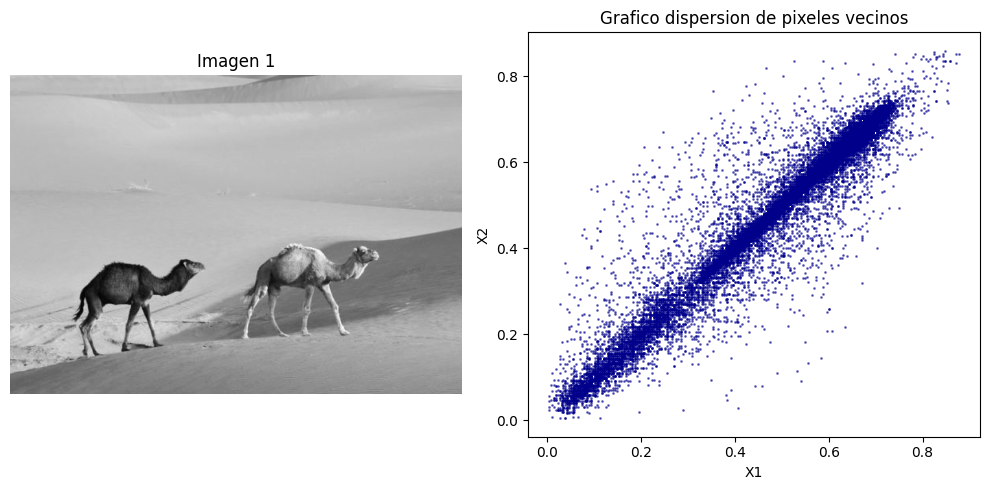

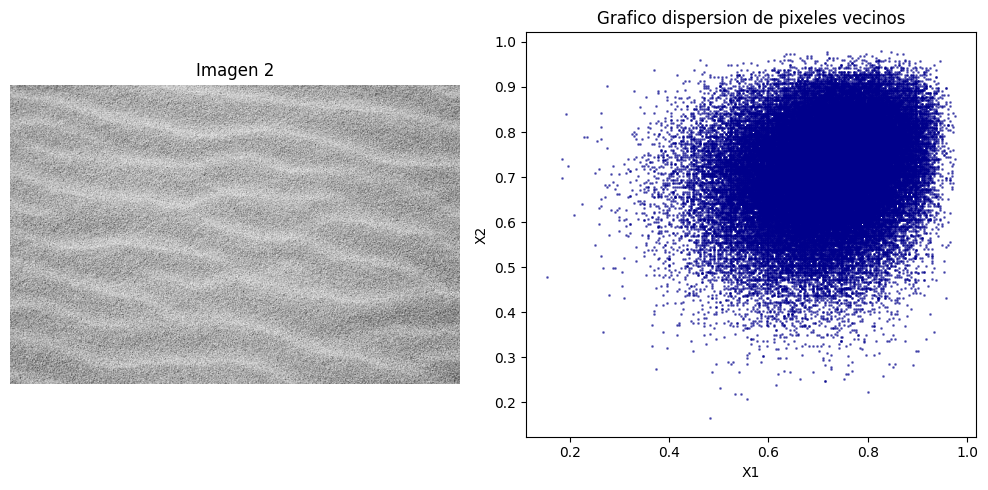

In [11]:
if __name__ == "__main__":
    img1 = Image.open("img_01.jpg").convert("L")
    img2 = Image.open("img_02.jpg").convert("L") #para pasar a escala de grises 
    
    #Convertir a float
    img1_float = np.array(img1, dtype = np.float32) / 255.0
    img2_float = np.array(img2, dtype = np.float32) / 255.0 # astype(float)

    #Grafico de dispersion para pixeles vecinos
    bloques1 = formar_bloques(img1_float)
    bloques2 = formar_bloques(img2_float)

    grafico_dispersion(bloques1, img1_float, "Imagen 1")
    grafico_dispersion(bloques2, img2_float, "Imagen 2")
    

#### (b) Estimacion del coeficiente de correlacion

In [12]:
def coef_correlacion(X):
    return np.corrcoef(X[0], X[1])[0,1]

0.9789974645340298


In [ ]:
if __name__ == "__main__":
    coef_correlacion_img1 = coef_correlacion(bloques1)
    coef_correlacion_img2 = coef_correlacion(bloques2)

    print(f"Coeficiente de correlacion img1: {coef_correlacion_img1}")
    print(f"Coeficiente de correlacion img2: {coef_correlacion_img2}")

#COMPLETAR CONCLUCION

Coeficiente de correlacion img1: 0.9789974645340295
Coeficiente de correlacion img2: 0.19524647761117764


##### Observamos que para la imagen uno, los pixeles vecinos estan altamente correlacionados, lo que significa que al conocer un pixel podemos deducir de el el valor de su pixel vecio, por lo que hay redundancia. Se puede comprimir con  alta eficiencia y manteniendo la calidad

##### Por otro lado, para la segunda imagen, ocurre el caso contrario. Los pixeles están poco correlacionados, lo que signufica que son independientes, por lo que no se puede deducir el valor de un pixel basandose en su vecino. Esto implica el aumento de bits para comprimir la imagen....

# Desacoplar 

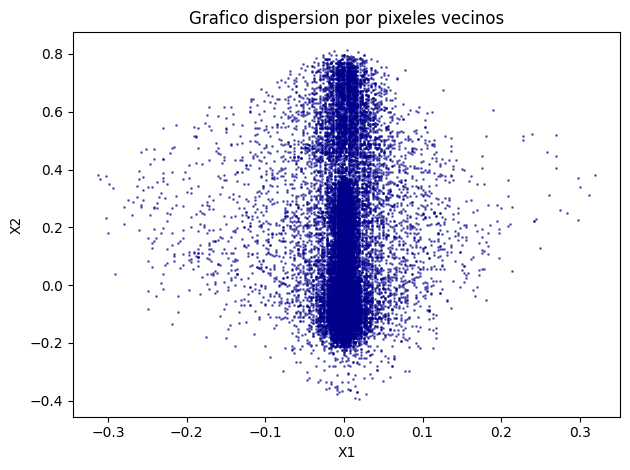

None


In [11]:
def desacoplar(X):
    mu = X.mean(axis = 1, keepdims = True) #opero fila por fila 
    Xc = X - mu #centramos

    #calculo covarianza entre pixeles vecinos
    Sigma = (Xc @ Xc.T)/ (Xc.shape[1] -1) #hago descomposicion espectral pra conseguir autovectores y autovaores
    eigvals, Q = np.linalg.eigh(Sigma)  #autovalores, autovectores col

    #descorrelacionamos
    Y = Q.T @ Xc
    return Y

print(grafico_dispersion(desacoplar(formar_bloques(img1_float))))

# Ejercicio 2: Compresion

In [ ]:

def pca_transform(A):
    # A = USV^t

    autovalores, autovectores = np.linalg.eig()